Computer the posterior probability on a regular grid in the input space

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
import sklearn.linear_model
import matplotlib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

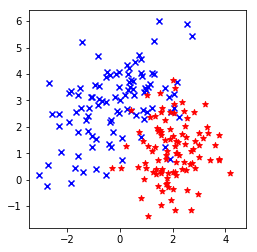

In [12]:
n = 100

Y1 = np.random.multivariate_normal([0, 3], [[2, 1], [1, 2]], 100)
Y2 = np.random.multivariate_normal([2, 1], [[1, 0], [0, 1]], 100)

plt.scatter(Y1[:, 0], Y1[:, 1],marker='x',c='b')
plt.scatter(Y2[:, 0], Y2[:, 1],marker='*',c='r')

plt.axis('square')
plt.savefig("sample.png", dpi = 600)
plt.show()

inputSet = np.vstack((Y1, Y2))#combine input data
outputSet = np.vstack((np.ones((n, 1)), (0) * (np.ones((n, 1)))))#genereate class output

i = np.random.permutation(2 * n)#disorganize

dataSet = np.hstack((inputSet[i[0:n * 2]], outputSet[i[0:n * 2]]))
np.savetxt('dataSet.csv', dataSet, delimiter=",")

rData = np.hsplit(dataSet, (2, 3))

inputTrainSet = rData[0].copy()

outputTrainSet = rData[1].copy()

np.savetxt('input.csv', inputTrainSet, delimiter=",")
np.savetxt('output.csv', outputTrainSet, delimiter=",")

In [13]:
outputTrainSet = np.ravel((outputTrainSet));#become 1-dimentional data
outputTrainSet = np.int_(outputTrainSet);
clf = GaussianNB()#instantiation
clf.fit(inputTrainSet,outputTrainSet)#input data









GaussianNB(priors=None)

In [103]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = inputTrainSet[:, 0].min() - .5, inputTrainSet[:, 0].max() + .5
    y_min, y_max = inputTrainSet[:, 1].min() - .5, inputTrainSet[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    predictOutputset = pred_func(inputTrainSet)
    print(accuracy_score(outputTrainSet, predictOutputset, normalize =True))
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(inputTrainSet[:, 0], inputTrainSet[:, 1], c=outputTrainSet, cmap=plt.cm.coolwarm)
    plt.annotate('m1,c1', xy=(-3.3, 6), xytext=(-2.9, 6),
            arrowprops=dict(facecolor='red', shrink=0.005),
            )
plt.annotate('m2,c2', xy=(-3.3, 5.5), xytext=(-2.9, 5.5),
            arrowprops=dict(facecolor='blue', shrink=0.005),
            )
    #plt.colorbar()


0.91


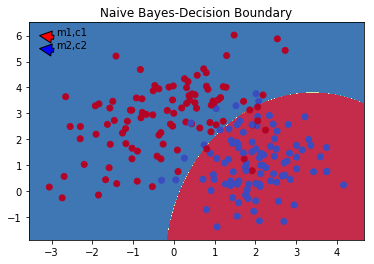

In [62]:
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Naive Bayes-Decision Boundary")
plt.annotate('m1,c1', xy=(-3.3, 6), xytext=(-2.9, 6),
            arrowprops=dict(facecolor='red', shrink=0.005),
            )
plt.annotate('m2,c2', xy=(-3.3, 5.5), xytext=(-2.9, 5.5),
            arrowprops=dict(facecolor='blue', shrink=0.005),
            )
plt.savefig("Decision Boundary of Naive_Bayes.png", dpi = 600)
plt.show() 



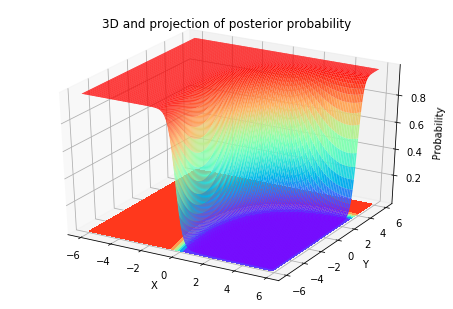

In [97]:
x, y = np.mgrid[-6:6:.1, -6:6:.1]
pos = np.dstack((x, y))

rv1 = multivariate_normal.pdf(pos, [0, 3], [[2, 1], [1, 2]])
rv2 = multivariate_normal.pdf(pos, [2, 1], [[1, 0], [0, 1]])

posterior_probability = 1 / (1 + (rv2 / rv1))


fig1 = plt.figure()
ax = Axes3D(fig1)
ax.plot_surface(
    x, y, posterior_probability, rstride=1, cstride=1, cmap='rainbow')#span=1
ax.set_zlabel("Probability")
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.contourf(x, y, posterior_probability, zdir='xz', offset=-0.01, cmap=plt.get_cmap('rainbow'))
plt.title("3D and projection of posterior probability")
plt.savefig("3DandProOfPosterior.png", dpi = 600)
plt.show()

Training a Neural Network

In [98]:
num_examples = len(inputTrainSet) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [99]:
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = inputTrainSet.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), outputTrainSet])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [100]:
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [101]:
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = inputTrainSet.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), outputTrainSet] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(inputTrainSet.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

Loss after iteration 0: 0.707852
Loss after iteration 1000: 0.187070
Loss after iteration 2000: 0.184344
Loss after iteration 3000: 0.183065
Loss after iteration 4000: 0.182160
Loss after iteration 5000: 0.181463
Loss after iteration 6000: 0.180926
Loss after iteration 7000: 0.180516
Loss after iteration 8000: 0.180203
Loss after iteration 9000: 0.179962
Loss after iteration 10000: 0.179776
Loss after iteration 11000: 0.179630
Loss after iteration 12000: 0.179515
Loss after iteration 13000: 0.179423
Loss after iteration 14000: 0.179349
Loss after iteration 15000: 0.179289
Loss after iteration 16000: 0.179240
Loss after iteration 17000: 0.179200
Loss after iteration 18000: 0.179167
Loss after iteration 19000: 0.179140
0.92


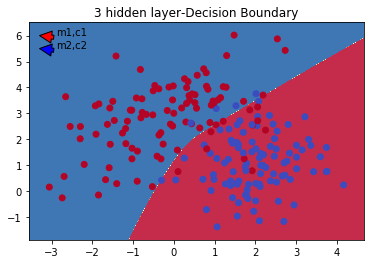

In [104]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("3 hidden layer-Decision Boundary")
plt.savefig("Decision Boundary for hidden layer size 3.png", dpi = 600)
plt.show()

0.91
0.96
0.965
0.93


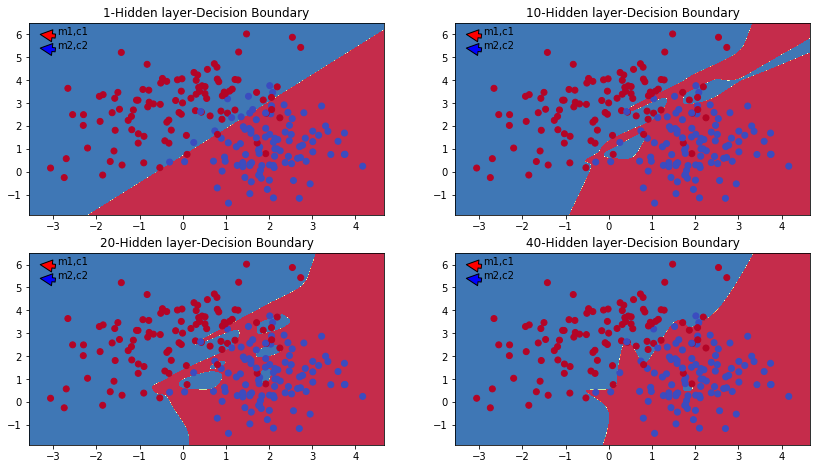

In [113]:
plt.figure(figsize=(14, 12))
hidden_layer_dimensions = [1,10,20,40]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(3, 2, i+1)
    plt.title('%d-Hidden layer-Decision Boundary' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))    
    plt.annotate('m2,c2', xy=(-3.3, 5.4), xytext=(-2.9, 5.4),
            arrowprops=dict(facecolor='blue', shrink=0.005),
            )
plt.savefig("Decision Boundary for Neural Network.png", dpi = 600)
plt.show()

Loss after iteration 0: 0.729016
Loss after iteration 1000: 0.186906
Loss after iteration 2000: 0.177713
Loss after iteration 3000: 0.165294
Loss after iteration 4000: 0.152184
Loss after iteration 5000: 0.147777
Loss after iteration 6000: 0.141068
Loss after iteration 7000: 0.138677
Loss after iteration 8000: 0.137093
Loss after iteration 9000: 0.136003
Loss after iteration 10000: 0.135294
Loss after iteration 11000: 0.134901
Loss after iteration 12000: 0.134518
Loss after iteration 13000: 0.134001
Loss after iteration 14000: 0.133641
Loss after iteration 15000: 0.133370
Loss after iteration 16000: 0.133196
Loss after iteration 17000: 0.133031
Loss after iteration 18000: 0.132767
Loss after iteration 19000: 0.132391
0.93


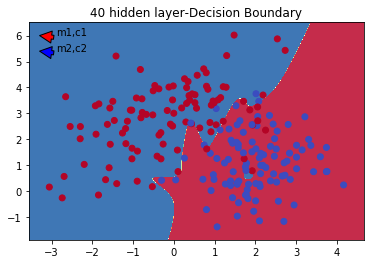

In [114]:
# Build a model with a 3-dimensional hidden layer
model = build_model(40, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("40 hidden layer-Decision Boundary")
plt.annotate('m2,c2', xy=(-3.3, 5.4), xytext=(-2.9, 5.4),
            arrowprops=dict(facecolor='blue', shrink=0.005),
            )
plt.savefig("Decision Boundary for hidden layer size 40.png", dpi = 600)
plt.show()